In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

Some pandas visualization practices

# Group boroughs by level

In [24]:
#Zhuoru Lin
#Convert output to df
f = open('../crime-data-process/results/borough_level.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = [pair[0].split(',') for pair in pairs]
values = [int(pair[1]) for pair in pairs]
df = pd.DataFrame([[key[0],key[1],values[i]] for i,key in enumerate(keys)],\
                  columns=['area','type','count'])
df = df.sort_values(by=['area','type'])
df = df.pivot(index='area',columns='type',values='count')

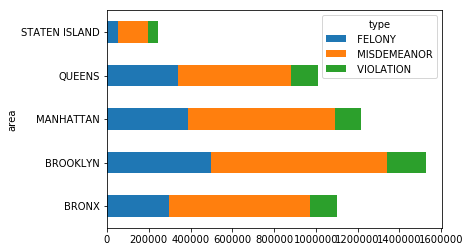

In [25]:
df.plot.barh(stacked=True)
plt.xlabel
plt.show()

# Group levels by year

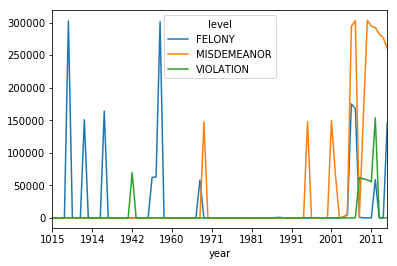

In [77]:
f = open('../crime-data-process/results/level_year.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = [pair[0].split(' ') for pair in pairs]
#Add line to remove uncompleted keys
keys = [key for key in keys if len(key)==2]
values = [int(pair[1]) for pair in pairs]
df = pd.DataFrame([[key[0],key[1],values[i]] for i,key in enumerate(keys)],\
                  columns=['level','year','count']).sort_values(by=['year','level'])
#comment out .fillna(0) if do not want to keep the original NaN
df = df.pivot(index='year',columns='level',values='count').fillna(0)
df.plot()
plt.savefig('level_year')
plt.show()

## Problem

In [41]:
#Missing year for some keys
pd.DataFrame(pairs).loc[189]

0    FELONY
1       220
Name: 189, dtype: object

In [48]:
#abnormal high values

# Offense by Premise 

In [65]:
f = open('../crime-data-process/results/offense_premise.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = [pair[0].split(',') for pair in pairs]
keys_bad = [key for key in keys if len(key)!=2]
print('Bad key output of which number of key is not 2')
print()
print('\n'.join([','.join(key_bad) for key_bad in keys_bad]))
print()
print('Delete %s rows from original data'%(len(keys_bad)))
keys = [key for key in keys if len(key)==2]
values = [int(pair[1]) for pair in pairs]
df = pd.DataFrame([[key[0],key[1],values[i]] for i,key in enumerate(keys)],\
                  columns=['offense','premise','count']).sort_values(by=['offense','premise'])
df.pivot(index='premise',columns='offense',values='count')

Bad key output of which number of key is not 2

LOITERING/GAMBLING (CARDS, DIC, PUBLIC BUILDING
LOITERING/GAMBLING (CARDS, DIC, PUBLIC SCHOOL
LOITERING/GAMBLING (CARDS, DIC, TRANSIT - NYC SUBWAY
HOMICIDE-NEGLIGENT,UNCLASSIFIE, RESIDENCE - PUBLIC HOUSING
LOITERING/GAMBLING (CARDS, DIC, STORE UNCLASSIFIED
HOMICIDE-NEGLIGENT,UNCLASSIFIE, RESIDENCE-HOUSE
LOITERING/GAMBLING (CARDS, DIC, SOCIAL CLUB/POLICY
LOITERING/GAMBLING (CARDS, DIC, RESIDENCE - PUBLIC HOUSING
HOMICIDE-NEGLIGENT,UNCLASSIFIE, RESIDENCE - APT. HOUSE
LOITERING/GAMBLING (CARDS, DIC, FAST FOOD
LOITERING/GAMBLING (CARDS, DIC, OTHER
LOITERING/GAMBLING (CARDS, DIC, GROCERY/BODEGA
LOITERING/GAMBLING (CARDS, DIC, PARK/PLAYGROUND
LOITERING/GAMBLING (CARDS, DIC, OPEN AREAS (OPEN LOTS)
LOITERING/GAMBLING (CARDS, DIC, STREET
LOITERING/GAMBLING (CARDS, DIC, SMALL MERCHANT
HOMICIDE-NEGLIGENT,UNCLASSIFIE, OTHER
LOITERING/GAMBLING (CARDS, DIC, RESIDENCE - APT. HOUSE
LOITERING/GAMBLING (CARDS, DIC, BEAUTY & NAIL SALON
LOITERING/GAMBLING (C

offense                        ABORTION  ADMINISTRATIVE CODE  \
premise                                                        
                                    NaN                  2.0   
 ABANDONED BUILDING                 NaN                  NaN   
 AIRPORT TERMINAL                   NaN                  2.0   
 ATM                                NaN                 21.0   
 BANK                               NaN                300.0   
 BAR/NIGHT CLUB                     NaN                 18.0   
 BEAUTY & NAIL SALON                NaN                  5.0   
 BOOK/CARD                          NaN                  NaN   
 BRIDGE                             NaN                 67.0   
 BUS (NYC TRANSIT)                  NaN                  2.0   
 BUS (OTHER)                        NaN                  NaN   
 BUS STOP                           NaN                 67.0   
 BUS TERMINAL                       NaN               2068.0   
 CANDY STORE                        NaN                 28.0   
 CEMETERY                           NaN               8189.0   
 CHAIN STORE                        NaN                  5.0   
 CHECK CASHING BUSINESS             NaN                 35.0   
 CHURCH                             NaN                  4.0   
 CLOTHING/BOUTIQUE                  NaN                 27.0   
 COMMERCIAL BUILDING                NaN                997.0   
 CONSTRUCTION SITE                  NaN                 87.0   
 DEPARTMENT STORE                   NaN               2646.0   
 DOCTOR/DENTIST OFFICE              NaN                  1.0   
 DRUG STORE                         NaN                195.0   
 DRY CLEANER/LAUNDRY                NaN                 92.0   
 FACTORY/WAREHOUSE                  NaN                  6.0   
 FAST FOOD                          NaN                 15.0   
 FERRY/FERRY TERMINAL               NaN                 14.0   
 FOOD SUPERMARKET                   NaN                121.0   
 GAS STATION                        NaN                 29.0   
...                                 ...                  ...   
 OTHER                              NaN               1058.0   
 OTHER HOUSE OF WORSHIP             NaN                  NaN   
 PARK/PLAYGROUND                    NaN                  2.0   
 PARKING LOT/GARAGE (PRIVATE)       NaN                  3.0   
 PARKING LOT/GARAGE (PUBLIC)        NaN                177.0   
 PHOTO/COPY                         NaN               1252.0   
 PRIVATE/PAROCHIAL SCHOOL           NaN                  1.0   
 PUBLIC BUILDING                    NaN                197.0   
 PUBLIC SCHOOL                      NaN                 25.0   
 RESIDENCE - APT. HOUSE             NaN                360.0   
 RESIDENCE - PUBLIC HOUSING         NaN                820.0   
 RESIDENCE-HOUSE                   11.0                 36.0   
 RESTAURANT/DINER                   NaN                886.0   
 SHOE                               NaN                  NaN   
 SMALL MERCHANT                     NaN                 65.0   
 SOCIAL CLUB/POLICY                 NaN                  4.0   
 STORAGE FACILITY                   NaN                 63.0   
 STORE UNCLASSIFIED                 NaN                  5.0   
 STREET                             4.0                 32.0   
 SYNAGOGUE                          NaN                  3.0   
 TAXI (LIVERY LICENSED)             NaN                281.0   
 TAXI (YELLOW LICENSED)             NaN                  NaN   
 TAXI/LIVERY (UNLICENSED)           NaN                  NaN   
 TELECOMM. STORE                    NaN                169.0   
 TRAMWAY                            NaN                  NaN   
 TRANSIT - NYC SUBWAY               NaN                  6.0   
 TRANSIT FACILITY (OTHER)           NaN                 11.0   
 TUNNEL                             NaN                  3.0   
 VARIETY STORE                      NaN             108537.0   
 VIDEO STORE                    

In [78]:
# This is not very easy to plot.